In [1]:
import sqlalchemy
import pandas as pd
import numpy as np
import sql_functions as sf

from sql_functions import *
import psycopg2

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
schema = 'capstone_jmrs'
spotahome_eda = sf.get_dataframe(f'SELECT * FROM {schema}.spotahome_merged')
spotahome_eda

,platform_id,platform,neighbourhood,property_type,price_pcm,furniture,let_type,available_today,scraping_date,price_pcm_0,price_pcm_1,bathrooms,size_sqm,bedrooms,available_from
0,654350,spotahome,Tower Hamlets,Apartment,3215,furnished,None,occupied,2022-10-04,3215.0,NaN,1.0,NaN,1.0,2022-10-15
1,654340,spotahome,Hackney,Apartment,2790,furnished,None,occupied,2022-10-04,2790.0,NaN,1.0,NaN,1.0,2023-01-08
2,777732,spotahome,City of Westminster,Apartment,4200,furnished,None,occupied,2022-10-04,4200.0,NaN,1.0,NaN,2.0,2022-10-08
3,436121,spotahome,Camden,Apartment,4000,furnished,None,occupied,2022-10-04,4000.0,NaN,1.0,77.0,2.0,2023-03-25
4,642016,spotahome,Kensington and Chelsea,Studio,3915,furnished,None,occupied,2022-10-04,3915.0,NaN,NaN,NaN,0.0,2022-10-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,843228,spotahome,Hackney,Apartment,7500-10500,furnished,None,occupied,2022-10-04,7500.0,10500.0,1.0,NaN,4.0,2022-10-13
832,844665,spotahome,Hackney,Apartment,8250-10950,furnished,None,occupied,2022-10-04,8250.0,10950.0,2.0,NaN,4.0,2023-01-08
833,843245,spotahome,Hackney,Apartment,9000-11250,furnished,None,occupied,2022-10-04,9000.0,11250.0,2.0,NaN,4.0,2023-01-11
834,602243,spotahome,Hackney,Apartment,9000-11250,furnished,None,occupied,2022-10-04,9000.0,11250.0,2.0,NaN,4.0,2023-08-04


In [3]:
spotahome_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform_id      836 non-null    object 
 1   platform         836 non-null    object 
 2   neighbourhood    836 non-null    object 
 3   property_type    836 non-null    object 
 4   price_pcm        836 non-null    object 
 5   furniture        836 non-null    object 
 6   let_type         0 non-null      object 
 7   available_today  836 non-null    object 
 8   scraping_date    836 non-null    object 
 9   price_pcm_0      836 non-null    float64
 10  price_pcm_1      247 non-null    float64
 11  bathrooms        519 non-null    float64
 12  size_sqm         262 non-null    float64
 13  bedrooms         836 non-null    float64
 14  available_from   836 non-null    object 
dtypes: float64(5), object(10)
memory usage: 98.1+ KB


In [4]:
spotahome_eda.describe()

,price_pcm_0,price_pcm_1,bathrooms,size_sqm,bedrooms
count,836.000000,247.000000,519.000000,262.000000,836.000000
mean,4399.885167,7997.336032,1.315992,60.110687,1.263158
std,1938.790440,3801.954404,0.636983,35.074075,1.104214
min,1112.000000,2881.000000,1.000000,12.000000,0.000000
25%,3090.000000,5500.000000,1.000000,40.000000,0.000000
50%,4125.000000,7200.000000,1.000000,55.000000,1.000000
75%,5221.250000,9218.500000,1.000000,75.000000,2.000000
max,13614.000000,27372.000000,5.000000,350.000000,6.000000


In [5]:
spotahome_eda.corr()

,price_pcm_0,price_pcm_1,bathrooms,size_sqm,bedrooms
price_pcm_0,1.000000,0.775776,0.489896,0.410722,0.523653
price_pcm_1,0.775776,1.000000,0.653239,0.688852,0.720156
bathrooms,0.489896,0.653239,1.000000,0.731517,0.620871
size_sqm,0.410722,0.688852,0.731517,1.000000,0.802987
bedrooms,0.523653,0.720156,0.620871,0.802987,1.000000


In [6]:
spotahome_eda['avg_price_sqm'] = spotahome_eda[['price_pcm_0', 'price_pcm_1']].mean(axis=1, skipna=True)

In [7]:
spotahome_eda

,platform_id,platform,neighbourhood,property_type,price_pcm,furniture,let_type,available_today,scraping_date,price_pcm_0,price_pcm_1,bathrooms,size_sqm,bedrooms,available_from,avg_price_sqm
0,654350,spotahome,Tower Hamlets,Apartment,3215,furnished,None,occupied,2022-10-04,3215.0,NaN,1.0,NaN,1.0,2022-10-15,3215.0
1,654340,spotahome,Hackney,Apartment,2790,furnished,None,occupied,2022-10-04,2790.0,NaN,1.0,NaN,1.0,2023-01-08,2790.0
2,777732,spotahome,City of Westminster,Apartment,4200,furnished,None,occupied,2022-10-04,4200.0,NaN,1.0,NaN,2.0,2022-10-08,4200.0
3,436121,spotahome,Camden,Apartment,4000,furnished,None,occupied,2022-10-04,4000.0,NaN,1.0,77.0,2.0,2023-03-25,4000.0
4,642016,spotahome,Kensington and Chelsea,Studio,3915,furnished,None,occupied,2022-10-04,3915.0,NaN,NaN,NaN,0.0,2022-10-10,3915.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,843228,spotahome,Hackney,Apartment,7500-10500,furnished,None,occupied,2022-10-04,7500.0,10500.0,1.0,NaN,4.0,2022-10-13,9000.0
832,844665,spotahome,Hackney,Apartment,8250-10950,furnished,None,occupied,2022-10-04,8250.0,10950.0,2.0,NaN,4.0,2023-01-08,9600.0
833,843245,spotahome,Hackney,Apartment,9000-11250,furnished,None,occupied,2022-10-04,9000.0,11250.0,2.0,NaN,4.0,2023-01-11,10125.0
834,602243,spotahome,Hackney,Apartment,9000-11250,furnished,None,occupied,2022-10-04,9000.0,11250.0,2.0,NaN,4.0,2023-08-04,10125.0


In [8]:
def my_func(x):
    try:
        return int(x['avg_price_sqm']) / int(x['size_sqm'])
    except (ZeroDivisionError, ValueError):
        return np.nan

spotahome_eda["price_per_sqm"] = spotahome_eda.apply(my_func, axis=1)

In [9]:
spotahome_eda

,platform_id,platform,neighbourhood,property_type,price_pcm,furniture,let_type,available_today,scraping_date,price_pcm_0,price_pcm_1,bathrooms,size_sqm,bedrooms,available_from,avg_price_sqm,price_per_sqm
0,654350,spotahome,Tower Hamlets,Apartment,3215,furnished,None,occupied,2022-10-04,3215.0,NaN,1.0,NaN,1.0,2022-10-15,3215.0,NaN
1,654340,spotahome,Hackney,Apartment,2790,furnished,None,occupied,2022-10-04,2790.0,NaN,1.0,NaN,1.0,2023-01-08,2790.0,NaN
2,777732,spotahome,City of Westminster,Apartment,4200,furnished,None,occupied,2022-10-04,4200.0,NaN,1.0,NaN,2.0,2022-10-08,4200.0,NaN
3,436121,spotahome,Camden,Apartment,4000,furnished,None,occupied,2022-10-04,4000.0,NaN,1.0,77.0,2.0,2023-03-25,4000.0,51.948052
4,642016,spotahome,Kensington and Chelsea,Studio,3915,furnished,None,occupied,2022-10-04,3915.0,NaN,NaN,NaN,0.0,2022-10-10,3915.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,843228,spotahome,Hackney,Apartment,7500-10500,furnished,None,occupied,2022-10-04,7500.0,10500.0,1.0,NaN,4.0,2022-10-13,9000.0,NaN
832,844665,spotahome,Hackney,Apartment,8250-10950,furnished,None,occupied,2022-10-04,8250.0,10950.0,2.0,NaN,4.0,2023-01-08,9600.0,NaN
833,843245,spotahome,Hackney,Apartment,9000-11250,furnished,None,occupied,2022-10-04,9000.0,11250.0,2.0,NaN,4.0,2023-01-11,10125.0,NaN
834,602243,spotahome,Hackney,Apartment,9000-11250,furnished,None,occupied,2022-10-04,9000.0,11250.0,2.0,NaN,4.0,2023-08-04,10125.0,NaN


In [10]:
spotahome_eda['price_per_sqm'] = spotahome_eda['price_per_sqm'].round(decimals = 2)

In [11]:
spotahome_eda

,platform_id,platform,neighbourhood,property_type,price_pcm,furniture,let_type,available_today,scraping_date,price_pcm_0,price_pcm_1,bathrooms,size_sqm,bedrooms,available_from,avg_price_sqm,price_per_sqm
0,654350,spotahome,Tower Hamlets,Apartment,3215,furnished,None,occupied,2022-10-04,3215.0,NaN,1.0,NaN,1.0,2022-10-15,3215.0,NaN
1,654340,spotahome,Hackney,Apartment,2790,furnished,None,occupied,2022-10-04,2790.0,NaN,1.0,NaN,1.0,2023-01-08,2790.0,NaN
2,777732,spotahome,City of Westminster,Apartment,4200,furnished,None,occupied,2022-10-04,4200.0,NaN,1.0,NaN,2.0,2022-10-08,4200.0,NaN
3,436121,spotahome,Camden,Apartment,4000,furnished,None,occupied,2022-10-04,4000.0,NaN,1.0,77.0,2.0,2023-03-25,4000.0,51.95
4,642016,spotahome,Kensington and Chelsea,Studio,3915,furnished,None,occupied,2022-10-04,3915.0,NaN,NaN,NaN,0.0,2022-10-10,3915.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,843228,spotahome,Hackney,Apartment,7500-10500,furnished,None,occupied,2022-10-04,7500.0,10500.0,1.0,NaN,4.0,2022-10-13,9000.0,NaN
832,844665,spotahome,Hackney,Apartment,8250-10950,furnished,None,occupied,2022-10-04,8250.0,10950.0,2.0,NaN,4.0,2023-01-08,9600.0,NaN
833,843245,spotahome,Hackney,Apartment,9000-11250,furnished,None,occupied,2022-10-04,9000.0,11250.0,2.0,NaN,4.0,2023-01-11,10125.0,NaN
834,602243,spotahome,Hackney,Apartment,9000-11250,furnished,None,occupied,2022-10-04,9000.0,11250.0,2.0,NaN,4.0,2023-08-04,10125.0,NaN


In [12]:
def my_func(x):
    try:
        return int(x['avg_price_sqm']) / int(x['bedrooms'])
    except (ZeroDivisionError, ValueError):
        return int(x['avg_price_sqm']) / 1

spotahome_eda["price_per_bedroom"] = spotahome_eda.apply(my_func, axis=1)

In [13]:
spotahome_eda

,platform_id,platform,neighbourhood,property_type,price_pcm,furniture,let_type,available_today,scraping_date,price_pcm_0,price_pcm_1,bathrooms,size_sqm,bedrooms,available_from,avg_price_sqm,price_per_sqm,price_per_bedroom
0,654350,spotahome,Tower Hamlets,Apartment,3215,furnished,None,occupied,2022-10-04,3215.0,NaN,1.0,NaN,1.0,2022-10-15,3215.0,NaN,3215.00
1,654340,spotahome,Hackney,Apartment,2790,furnished,None,occupied,2022-10-04,2790.0,NaN,1.0,NaN,1.0,2023-01-08,2790.0,NaN,2790.00
2,777732,spotahome,City of Westminster,Apartment,4200,furnished,None,occupied,2022-10-04,4200.0,NaN,1.0,NaN,2.0,2022-10-08,4200.0,NaN,2100.00
3,436121,spotahome,Camden,Apartment,4000,furnished,None,occupied,2022-10-04,4000.0,NaN,1.0,77.0,2.0,2023-03-25,4000.0,51.95,2000.00
4,642016,spotahome,Kensington and Chelsea,Studio,3915,furnished,None,occupied,2022-10-04,3915.0,NaN,NaN,NaN,0.0,2022-10-10,3915.0,NaN,3915.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,843228,spotahome,Hackney,Apartment,7500-10500,furnished,None,occupied,2022-10-04,7500.0,10500.0,1.0,NaN,4.0,2022-10-13,9000.0,NaN,2250.00
832,844665,spotahome,Hackney,Apartment,8250-10950,furnished,None,occupied,2022-10-04,8250.0,10950.0,2.0,NaN,4.0,2023-01-08,9600.0,NaN,2400.00
833,843245,spotahome,Hackney,Apartment,9000-11250,furnished,None,occupied,2022-10-04,9000.0,11250.0,2.0,NaN,4.0,2023-01-11,10125.0,NaN,2531.25
834,602243,spotahome,Hackney,Apartment,9000-11250,furnished,None,occupied,2022-10-04,9000.0,11250.0,2.0,NaN,4.0,2023-08-04,10125.0,NaN,2531.25


In [14]:
spotahome_eda['price_per_bedroom'] = spotahome_eda['price_per_bedroom'].round(decimals = 2)

In [15]:
spotahome_eda.drop(columns=['price_pcm', 'price_pcm_0', 'price_pcm_1'], inplace=True)

In [16]:
spotahome_eda.rename(columns={'avg_price_sqm': 'price_pcm'}, inplace=True)

In [17]:
spotahome_eda.describe()

,bathrooms,size_sqm,bedrooms,price_pcm,price_per_sqm,price_per_bedroom
count,519.000000,262.000000,836.000000,836.000000,262.000000,836.000000
mean,1.315992,60.110687,1.263158,4834.543660,96.694733,3410.121124
std,0.636983,35.074075,1.104214,2423.752431,45.601454,1419.266020
min,1.000000,12.000000,0.000000,1200.000000,14.750000,420.000000
25%,1.000000,40.000000,0.000000,3300.000000,62.707500,2345.832500
50%,1.000000,55.000000,1.000000,4407.000000,90.000000,3300.000000
75%,1.000000,75.000000,2.000000,5700.000000,125.000000,4346.250000
max,5.000000,350.000000,6.000000,19751.000000,334.380000,12200.000000


In [18]:
spotahome_eda['neighbourhood'].value_counts()

Kensington and Chelsea    259
City of Westminster       177
Camden                    139
Tower Hamlets              61
Hackney                    51
Islington                  46
Hammersmith and Fulham     43
Lambeth                    41
City of London             19
Name: neighbourhood, dtype: int64

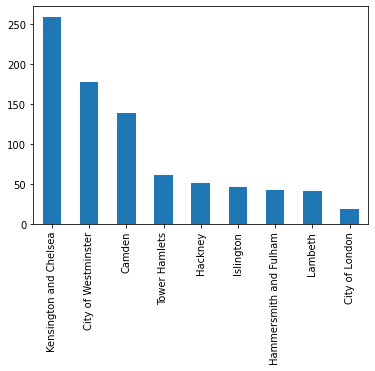

In [19]:
spotahome_eda['neighbourhood'].value_counts().plot(kind='bar');

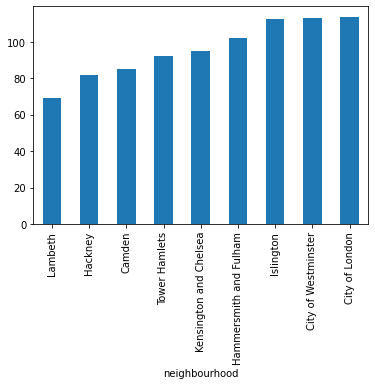

In [20]:
spotahome_eda.groupby('neighbourhood')['price_per_sqm'].mean().sort_values().plot(kind='bar');

In [21]:
# call the schema created for this project
schema = 'capstone_jmrs'
# get the function to connect to the database
engine = get_engine()

# give the table a unique name
table_name = 'spotahome_eda'

# import the table to sql
if engine != None:
    try:
        spotahome_eda.to_sql(name=table_name,
                                   con=engine,
                                   if_exists='replace',
                                   schema=schema,
                                   index=False,
                                   chunksize=5000,
                                   method='multi')
        print(f"The {table_name} table was imported successfully.")

    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None


The spotahome_eda table was imported successfully.
